In [1]:
import numpy as np
from scipy.stats import wishart
import matplotlib.pyplot as plt

In [59]:
COV_SCALE  = 0.001
E_MAX = 0.9 # No bound on excentricity

n = 1000 # Number of observations
p = 2 # Number of variables
k = 3 # Number of clusters

In [14]:
def shrink_eigvals(m, e_max):
    """
    Shrinks the eigenvalues of matrix m such that excentricity sqrt(1 - lambda_1 / lambda_p) <= e_max.
    
    """
    p = m.shape[0]
    w, v = np.linalg.eigh(m)
    e = np.sqrt(1 - w[0] / w[p-1]) # Excentricity
    w_shrunk = w
    if e > e_max: # Shrink eigenvalues
        w_gap = w[p-1] - w[0]
        for i in range(p):
            w_shrunk[i] = w[p-1] * (1 - e_max**2 * (w[p-1] - w[i])/w_gap)
    
    m_shrunk = v.T @ np.diag(w_shrunk) @ v
    
    return m_shrunk
    

In [15]:
def generate_params(p, k, cov_scale, e_max=-1):
    
    # Proportions of each cluster:    
    pi = np.random.uniform(0, 1, k)
    pi /= pi.sum()  # normalize
    
    # Mean of each cluster:
    mu = np.random.uniform(0, 1, (k, p))
    
    # Covariance matrices:
    A = np.eye(p) * cov_scale
    sigma = wishart.rvs(p + 1, A, size=k)
    if e_max >= 0:
        for j in range(k):
            sigma[j] = shrink_eigvals(sigma[j], e_max)
    
    return pi, mu, sigma

In [16]:
def generate_obs(n, p, k, pi, mu, sigma):
    """
    Generates 10k observations from a multivariate Gaussian mixture model.
    
    """    
    # Generate n observations from each cluster:
    choice = np.random.choice(k, n, p=pi)
  
    x = np.zeros((n,p))
    for i in range(n):
        x[i, :] = np.random.multivariate_normal(mu[choice[i]],sigma[choice[i]])
        
    return x, choice

In [62]:
pi, mu, sigma = generate_params(p, k, COV_SCALE, E_MAX)
x, choice = generate_obs(n, p, k, pi, mu, sigma)
#w, v = np.linalg.eigh(sigma[0])

print(x)
#print(x.nbytes)

[[0.22398799 0.06401963]
 [0.25131487 0.08116844]
 [0.31013814 0.11302369]
 ...
 [0.91186882 0.35950195]
 [0.26347959 0.13916061]
 [0.2970417  0.14046932]]


In [70]:
# Write pi in a file
with open('pi_n{}_p{}_k{}_covscale{:.4f}_emax{:.2f}.csv'.format(n, p, k, COV_SCALE, E_MAX), 'w') as file:
    for i in range(k):
        file.write("{:.16f};".format(pi[i]))

In [71]:
# Write mu in a file
with open('mu_n{}_p{}_k{}_covscale{:.4f}_emax{:.2f}.csv'.format(n, p, k, COV_SCALE, E_MAX), 'w') as file:
    for i in range(k):
        for j in range(p):
            file.write("{:.16f};".format(mu[i, j]))
        file.write("\n")

In [72]:
# Write sigma in a file (flattened array)
with open('sigma_n{}_p{}_k{}_covscale{:.4f}_emax{:.2f}.csv'.format(n, p, k, COV_SCALE, E_MAX), 'w') as file:
    for i in range(k):
        for j1 in range(p):
            for j2 in range(p):
                file.write("{:.16f};".format(sigma[i, j1, j2]))
        file.write("\n")

In [73]:
# Write choices in a file
with open('choices_n{}_p{}_k{}_covscale{:.4f}_emax{:.2f}.csv'.format(n, p, k, COV_SCALE, E_MAX), 'w') as file:
    for i in range(n):
        file.write("{};".format(choice[i]))

In [74]:
# Write dataset in a file
with open('data_n{}_p{}_k{}_covscale{:.4f}_emax{:.2f}.csv'.format(n, p, k, COV_SCALE, E_MAX), 'w') as file:
    for i in range(n):
        for j in range(p):
            file.write("{:.16f};".format(x[i, j]))
        file.write("\n")

Text(0.5, 1.0, 'Simulated gausian mixture')

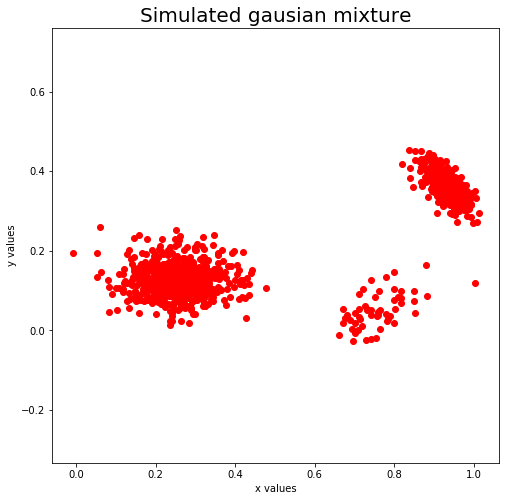

In [63]:
plt.figure(figsize=(8, 8))
plt.plot(x[:,0], x[:,1], 'ro')
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('equal');
plt.title("Simulated gausian mixture", fontsize=20)

In [64]:
print(mu)

[[0.75563529 0.05076578]
 [0.92610299 0.36594041]
 [0.25553075 0.12899948]]
